# Finite Difference Derivative Approximations

## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:
* Derive and apply forward and backward finite difference formulas.
* Derive and apply the central finite difference formula.
* Compare the truncation and random error in the different derivative approximation methods.
* Rearrange a Taylor series formula to estimate a second (or higher) derivative.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Forward Finite Difference

From the Taylor series at $x+h$,

$$f(x + h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{6}f'''(x) + O(h^4),$$

we notice that there is an $f'(x)$ term in the equation.  If we "solve" for this derivative by subtracting $f(x)$ from both sides and then dividing by $h$ we get

$$\frac{f(x+h) - f(x)}{h} = f'(x) + \frac{h}{2} f''(x) + \frac{h^2}{6}f'''(x) + O(h^3),$$

or in shorter form

$$\frac{f(x+h) - f(x)}{h} = f'(x) + O(h).$$

Therefore the approximation

$$f'(x) \approx \frac{f(x+h) - f(x)}{h},$$

is an <b>order $h$</b> approximation because the error is proportional to $h$ as $h$ goes to 0. This is called a forward difference formula because the function is evaluated $h$ forward of $x$ to approximate the derivative.

## Backward Finite Difference

We did this using $f(x+h)$ in our formula, but we could have also used $f(x-h)$ which has the Taylor series

$$f(x - h) = f(x) - h f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{6}f'''(x) + O(h^4),$$

to get the formula

$$\frac{f(x) - f(x-h)}{h} = f'(x) + O(h).$$

Therefore the approximation

$$f'(x) \approx \frac{f(x) - f(x-h)}{h},$$

is also an <b>order $h$</b> approximation because the error is proportional to $h$ as $h$ goes to 0. This formula is a backward difference formula because the function is evaluated $h$ behind $x$.

## Example to Compare the Approximations

Consider the function 

$$f(x) =  \arctan(x) \cosh(x),$$

which is plotted below.

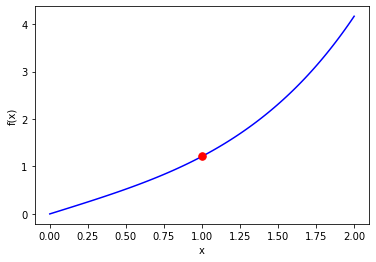

In [2]:
# define Python function
f = lambda x: np.cosh(x)*np.arctan(x)

# plot from 0 to 2 with 100 evenly spaced points
xplot = np.linspace(0,2,100)

# evaluate function at points xplot
fplot = f(xplot)

# create plot
plt.plot(xplot,fplot,'b-')
plt.plot(1.0, f(1.0),'r.',markersize=15)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

We want to numerically approximate $f'(x)$ at $x=1$ (red circle on the plot). The actual answer is $f'(1) = 1.694541176517952557683135$.

Below is Python code to compute a finite difference approximation at $x=1$ for different $h$ values. We then graphically study how the approximation error depends on $h$.

Forward Difference slope on log-log scale is 1.010405053694006


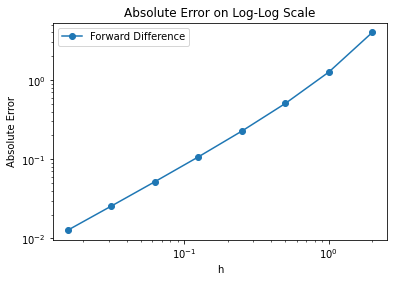

In [3]:
# define Python function (I did not need to do this because 'f' is defined in the previous cell)
f = lambda x: np.cosh(x)*np.arctan(x)

# specify values of h to study
h = 2**np.array([1,0,-1.0,-2,-3,-4,-5,-6])

# create vector of zeros to store results
forward = 0*h #variable to hold forward difference 

# create counter
count = 0

# define exact solution
exact = 1.694541176517952557683135

# specify value of x to study
x = 1

# loop over all values for h
for i in h:
    
    # compute forward finite difference approximation
    forward[count] = (f(x+i) - f(x))/i

    count += 1
    
# plot absolute value of approximation error versus h on log-log plot
plt.loglog(h,np.fabs(forward-exact),'o-',label="Forward Difference")

plt.legend(loc="best")
plt.title("Absolute Error on Log-Log Scale")
plt.xlabel("h")
plt.ylabel("Absolute Error")

#print FD error slope
errors = np.fabs(forward-exact)
print("Forward Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))


Remember, the plot above uses a log-log scale. The linear trend with slope one means the absolute error grows $O(h^1)$. Notice that for $h$ values around 10$^0$ and higher, the slope increases.

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Adapt the code below to also study the backward finite difference formula. Look for the comments that say "activity" for hints where to modify.
</div>

Forward Difference slope on log-log scale is 1.010405053694006
Backward Difference slope on log-log scale is 0.989507882880635


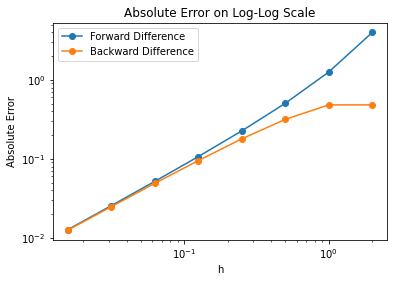

In [4]:
# define Python function (I did not need to do this because 'f' is defined in the previous cell)
f = lambda x: np.cosh(x)*np.arctan(x)

# specify values of h to study
h = 2**np.array([1,0,-1.0,-2,-3,-4,-5,-6])

# create vector of zeros to store results
forward = 0*h #variable to hold forward difference 

# activity: uncomment line below
# backward = 0*h #variable to hold backward difference
# Add your solution here

# create counter
count = 0

# define exact solution
exact = 1.694541176517952557683135

# specify value of x to study
x = 1

# loop over all values for h
for i in h:
    
    # compute forward finite difference approximation
    forward[count] = (f(x+i) - f(x))/i
    
    # activity: uncomment and complete line below
    # backward[count] = # student fill in here
    # Add your solution here
    count += 1
    
# plot absolute value of approximation error versus h on log-log plot
plt.loglog(h,np.fabs(forward-exact),'o-',label="Forward Difference")
# activity: copy the line above and modify to plot results with backwards difference formula 
# Add your solution here

plt.legend(loc="best")
plt.title("Absolute Error on Log-Log Scale")
plt.xlabel("h")
plt.ylabel("Absolute Error")

#print FD error slope
errors = np.fabs(forward-exact)
print("Forward Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))

# activity: copy the two lines above and modify for backward difference formula
# Add your solution here


## Higher-order Approximations

Both of the forward and backward formulas for the derivative are first-order in $h$.  These formulas are fine, but as we will see when we solve differential equations, first-order solutions typically have too much error for our purposes.  We desire a way of getting higher-order approximations to the derivative.

### Central Difference Formula

We will start with the **central difference formula**:

$$\frac{f(x+h) - f(x-h)}{2h} \approx f'(x)$$


<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 With a partner, determine the error order of the central difference formula. Use the following steps.
</div>

1. Copy the Taylor series approximations $f(x + h)$ and $f(x-h)$ on a new sheet of paper.
2. Subtract $f(x-h)$ from $f(x + h)$ to get $(f(x+h) - f(x-h))$
3. Cancel terms, divide by $2h$, and rearrange to obtain

$$\frac{f(x+h) - f(x-h)}{2h} = f'(x) ~+~ ...$$

4. Examine the ... part to determine the error order. How does is grow with $h$?

**Discussion for after class activity.**

The approximation

$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h},$$

is an <b>order $h^2$</b> approximation because the error is proportional to $h^2$ as $h$ goes to 0.

This is called a central-difference formula because the function is evaluated around a center of $x$ a value of $h$ on either side. One thing to note is that the error terms in this approximation only have even powers of $h$ because of the way the odd powers cancel when combining the two.

With a second-order approximation, if I cut $h$ in half, the error goes down by a factor of 4, compared to a factor of 2 with a first-order method.

We could go through the process of obtaining even higher-order derivatives (third-order, fourth-order, etc), but in practice this is generally not useful because the formulas become cumbersome and there are typically better ways of accomplishing higher-order accuracy. We will see one of these ways shortly.

### Comparison of the approximations

Let's revist the example 

$$f(x) =  \arctan(x) \cosh(x)$$

and look at approximations to $f'(x)$ at $x=1$. Recall, the actual answer is $f'(1) = 1.694541176517952557683135$.

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 With a partner, modify the code below to also study the central difference approximation for this example. Make a plot that compares forward, backward and central different formulas.
</div>

Forward Difference slope on log-log scale is 1.010405053694006
Backward Difference slope on log-log scale is 0.989507882880635
Central Difference slope on log-log scale is 2.0000468073506825


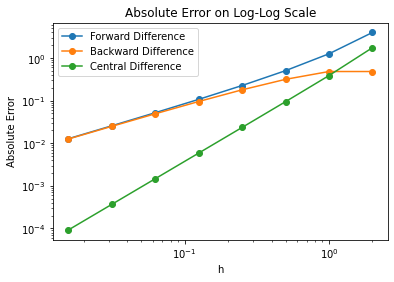

In [5]:
# define Python function (I did not need to do this because 'f' is defined in the previous cell)
f = lambda x: np.cosh(x)*np.arctan(x)

# specify values of h to study
h = 2**np.array([1,0,-1.0,-2,-3,-4,-5,-6])

# create vector of zeros to store results
forward = 0*h #variable to hold forward difference 

backward = 0*h #variable to hold backward difference 

# activity: uncomment line below
#central = 0*h #variable to hold central differences
# Add your solution here

# create counter
count = 0

# define exact solution
exact = 1.694541176517952557683135

# specify value of x to study
x = 1

# loop over all values for h
for i in h:
    
    # compute forward finite difference approximation
    forward[count] = (f(x+i) - f(x))/i
    
    # compute backward finite difference approximation
    backward[count] = (f(x)-f(x-i))/i
    
    # activity: write formula for central finite difference approximation
    # Add your solution here
    
    count += 1
    
# plot absolute value of approximation error versus h on log-log plot
plt.loglog(h,np.fabs(forward-exact),'o-',label="Forward Difference")
plt.loglog(h,np.fabs(backward-exact),'o-',label="Backward Difference")
# activity: copy the line above and modify to plot results with central difference formula 
# Add your solution here

plt.legend(loc="best")
plt.title("Absolute Error on Log-Log Scale")
plt.xlabel("h")
plt.ylabel("Absolute Error")

# print FD error slope
errors = np.fabs(forward-exact)
print("Forward Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))

# print BD error slope
errors = np.fabs(backward-exact)
print("Backward Difference slope on log-log scale is",(np.log(errors[-1])-np.log(errors[-2]))/(np.log(h[-1])-np.log(h[-2])))

# activity: copy the above two lines and modify to print CD error slope
# Add your solution here


**Discussion after class activity**

In this example we see that the errors decay as expected for the two first-order methods and the one second-order method. As we expect, as $h$ gets smaller the second-order method wins out. Nevertheless, this does not mean that at a particular value of $h$ the second-order method will have smaller error.  The graph above shows that at $h=2$, the backward difference approximation has the smallest error. This is due to the fact that order of the formula just says how the error changes with $h$ and says nothing about the constant in front of the leading-order term.  Eventually, the second-order method will win, but we cannot say anything about a particular point.

## Truncation and Random Errors

In this notebook, we learned about *truncation error*. We will now study *random errors*. We will see that our choice in $h$ for the approved finite different formulas requires balancing truncation versus random errors.

Consider the following test function:

$$ f(x) = e^{x} $$

with

$$f'(x) = e^{x}$$

Let's compare forward, backward, and central difference formulas for this function.

### Forward Difference

$$ f'_f(a) = \frac{f(a+\epsilon) - f(a)}{\epsilon} $$

You'll notice I switched to using $\epsilon$ instead of $h$. Textbooks are about evenly split on the notation. 

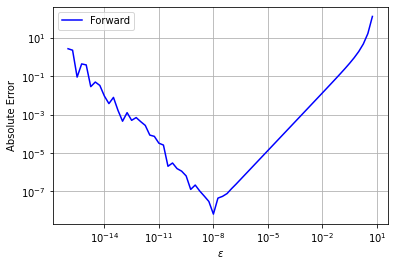

In [6]:
# Define the test function
def my_f(x):
    return np.exp(x)

# Specify point to examine
a = 1.0

# Calculate function value at x = a
fa = my_f(a)
# Calculate exact first derivative at x=1
df1 = my_f(a) # Need to replace if you consider a different test function!

# Generate values for epsilon
eps = np.power(10,np.arange(-16,1,0.25))
n = len(eps)

# Preallocate error array
error_forward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_forward = (my_f(a + eps[i]) - fa)/eps[i]
    error_forward[i] = abs(df1_forward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()

This plot succinctly shows the trade-offs between truncation and random errors that are ubiquitous across scientific computing. 
* On the **left**, we see a jagged line where absolute error increases with decreasing $\epsilon$. This is because of **random error**. The computer can only do arithmetic with finite percision. Recall the finite difference formulas require dividing by $\epsilon$, so as $\epsilon$ decreases the random error increases.
* On the **right**, we see a smooth line where absolute error increases with increasing $\epsilon$. This is because of **truncation error**. We learned in the [last notebook](../03-publish/01-Taylor-Series.ipynb) how the Taylor series approximation gets worse with increasing $\epsilon$ (which is the same as $h$).

<div class="admonition seealso"> 
<p class="title"><b>Home Activity</b></p>
 Write a sentence to describe what happens in the middle of the plot. Specifically discuss <i>random error</i> and <i>truncation error</i> in your sentence.
</div>

**Home Activity Answer**:

### Backward Difference

Let's add backward difference to the same plot.

$$ f'_b(a) = \frac{f(a) - f(a - \epsilon)}{\epsilon} $$

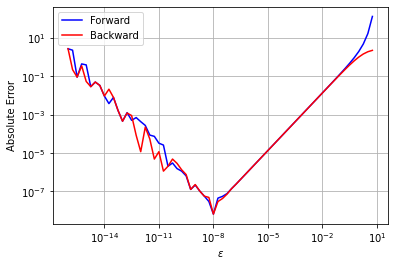

In [7]:
# Preallocate error array
error_backward = np.zeros(n)

# Calculate finite difference approximation and error
for i in range(0,n):
    df1_backward = (fa - np.exp(a - eps[i]))/eps[i]
    error_backward[i] = abs(df1_backward - df1)

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.legend()
plt.show()

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 With a partner, speculate as to why the forward and backward difference curves are so similar. Why is the slope of the trends on the right the same? (Hint: look at the Taylor series analysis of these schemes early in the class notes.)
</div>

### Central Difference

Finally, we will consider the central difference formula:

$$ f'_c(a) = \frac{f(a+\epsilon) - f(a - \epsilon)}{2 \epsilon} $$

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 With a partner, add the cental difference formula to the plot. Hint: copy the backward difference code to below and modify. Then write three bullet points to discuss the plot.
</div>

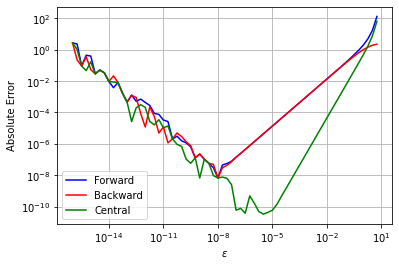

In [16]:
# Preallocate error array
# Add your solution here

# Calculate finite difference approximation and error
# Add your solution here

# Plot
plt.figure()
plt.loglog(eps,error_forward,label="Forward",color="blue")
plt.loglog(eps,error_backward,label="Backward",color="red")
# add central difference plot below
# Add your solution here
plt.xlabel("$\epsilon$")
plt.ylabel("Absolute Error")
plt.grid(True)
plt.legend()
plt.show()

Write three bullet points to describe and discuss trends in the plot:
* 

*

* 

### Second (and Higher) Derivatives

We can also use the Taylor series to derive finite difference approximations for $f''(x)$:

$$\frac{f(x + h) -2 f(x) + f(x-h)}{h^2} = f''(x) + O(h^2)$$

<div class="admonition note"> 
<p class="title"><b>Class Activity</b></p>
 With a partner, derive the above approximation for f''(x). Use the following steps.
</div>

1. Write the Taylor series for f(x+h)
2. Write the Taylor series for f(x-h)
3. Add these two Taylor series together. Notice the $h$ and $h^3$ terms cancel.
4. Rearrange to isolate f''(x).

If we want high-order approximations to derivatives (or many other quantities) we can use Richardson extrapolation. This is an advanced topic we will not discuss further in this class. For those who are interested, I recommend reading the section 14.6 in *Computational Nuclear Engineering and Radiological Science Using Python*. 